In [241]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from datetime import datetime

In [242]:
series = pd.read_csv('E:\Amila\Amila\Predictive Analytics\L&D\AirPassengers.csv')
print(series.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [243]:
def dateparse(x):
    return datetime.strptime(x, '%Y-%m')


series = pd.read_csv('E:\Amila\Amila\Predictive Analytics\L&D\AirPassengers.csv',  index_col='Month',date_parser=dateparse)
print(series.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


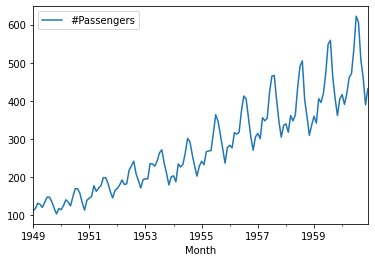

In [244]:
series.plot()
pyplot.show()

In [245]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig  =  pyplot.plot(timeseries, color='blue',label='Original')
    mean  =  pyplot.plot(rolmean, color='red', label='Rolling Mean')
    std   =  pyplot.plot(rolstd, color='black', label = 'Rolling Std')
    pyplot.legend(loc='best')
    pyplot.title('Rolling Mean & Standard Deviation')
    #set plot size
    fig = pyplot.gcf() 
    fig.set_size_inches(11,8)
    #show plot
    pyplot.show(block=False)
    
 
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

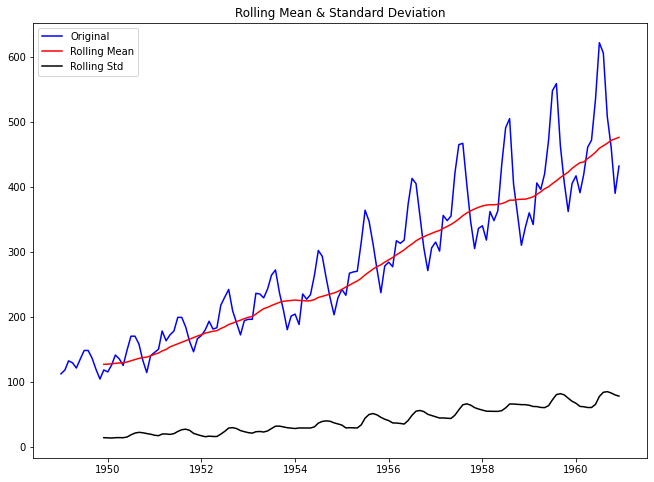

Results of Dickey-Fuller Test:
Test Statistic                  -1.748093
p-value                          0.406519
#Lags Used                       0.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [246]:
test_stationarity(series['#Passengers'])

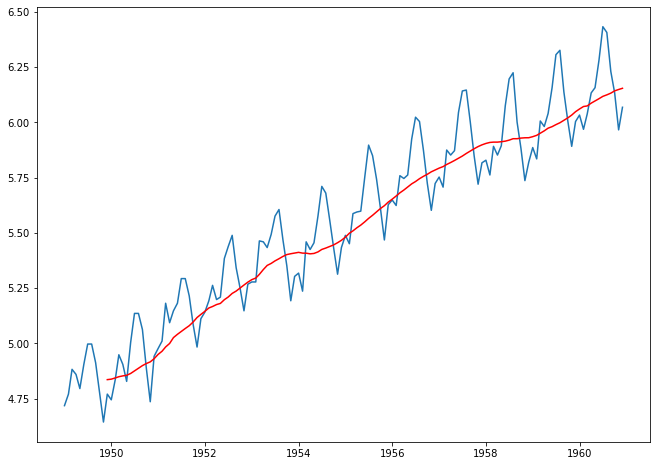

In [247]:
#log transform of data set for simplisity
ts_log = np.log(series['#Passengers'])
#get moving average
rolmean = ts_log.rolling(window=12).mean()
pyplot.plot(ts_log)
pyplot.plot(rolmean, color='red')

#set plot size
fig = pyplot.gcf() 
fig.set_size_inches(11,8)

In [248]:
ts_log_moving_avg_diff = ts_log - rolmean
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

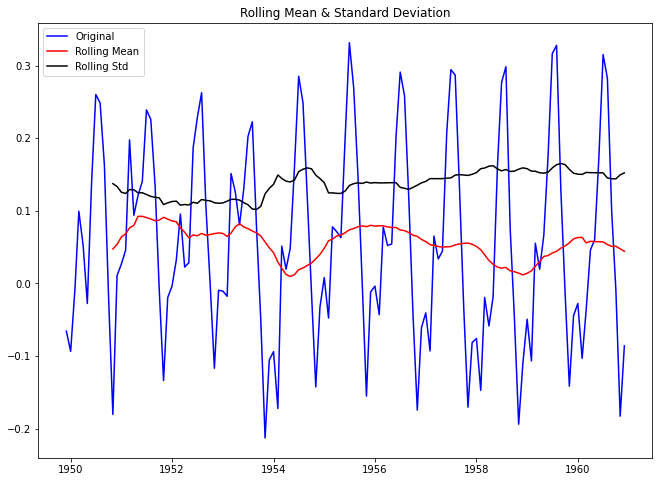

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [249]:
#Remove missing values
ts_log_moving_avg_diff.dropna(inplace=True)
#print(ts_log_moving_avg_diff)
test_stationarity(ts_log_moving_avg_diff)

In [250]:
#The rolling values appear to be varying slightly but there is no specific trend. 
#Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that 
#this is a stationary series.

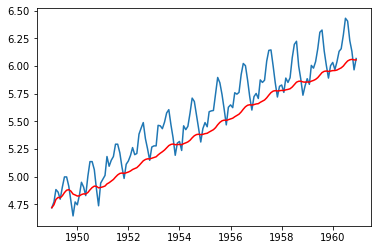

In [251]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
pyplot.plot(ts_log)
pyplot.plot(expwighted_avg, color='red')

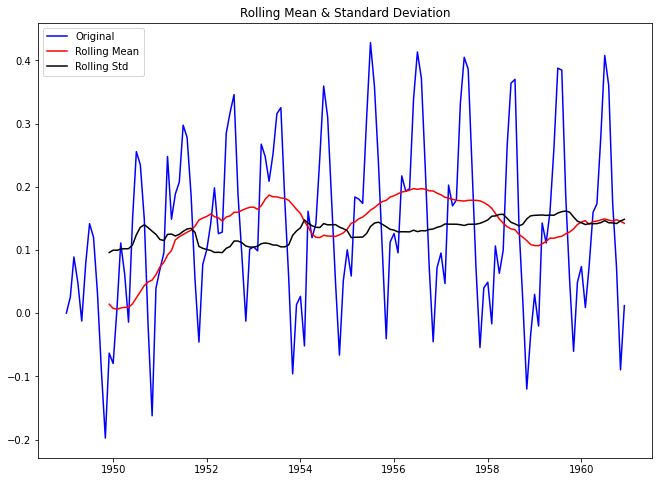

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [252]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [253]:
#This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than 
#the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as 
#all values from starting are given weights. So it’ll work even with no previous values.

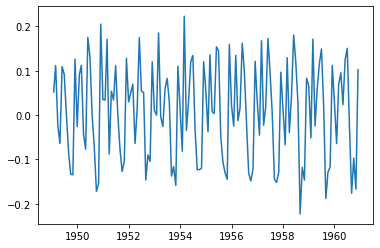

In [254]:
#Differencing - methods of dealing with both trend and seasonality
ts_log_diff = ts_log - ts_log.shift()
pyplot.plot(ts_log_diff)

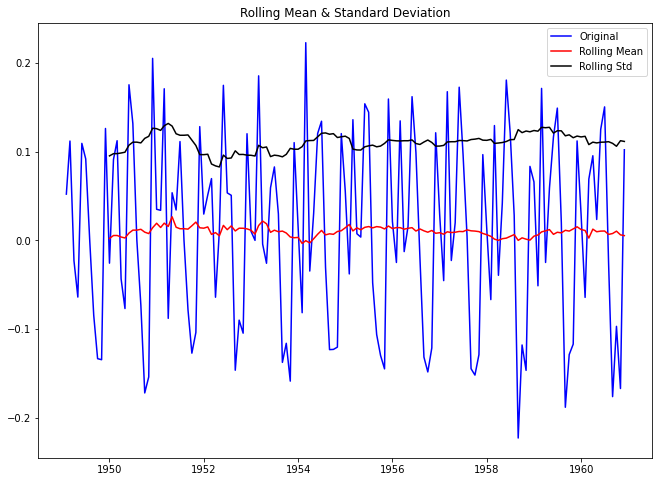

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [255]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# 

In [256]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [257]:
lag_acf = acf(ts_log_diff, nlags=20 )
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols' )

c:\users\amilah.axienta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


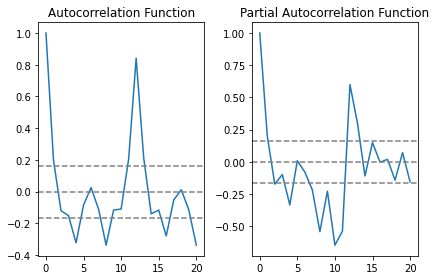

In [258]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
pyplot.subplot(121)    
pyplot.plot(lag_acf)
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
pyplot.title('Autocorrelation Function')

#Plot PACF:
pyplot.subplot(122)
pyplot.plot(lag_pacf)
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
pyplot.title('Partial Autocorrelation Function')
pyplot.tight_layout()

In [259]:
from statsmodels.tsa.arima_model import ARIMA

# Combined Model

c:\users\amilah.axienta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\amilah.axienta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Valu

Text(0.5, 1.0, 'RSS: 1.0292')

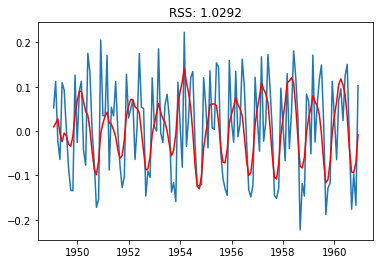

In [309]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
pyplot.plot(ts_log_diff)
pyplot.plot(results_ARIMA.fittedvalues, color='red')
pyplot.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Convert to original scale

In [310]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [311]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [312]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

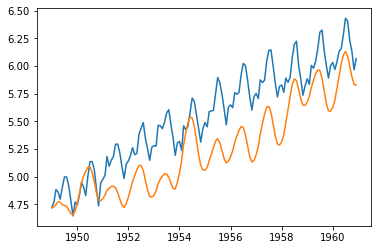

In [313]:
pyplot.plot(ts_log)
pyplot.plot(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 90.1049')

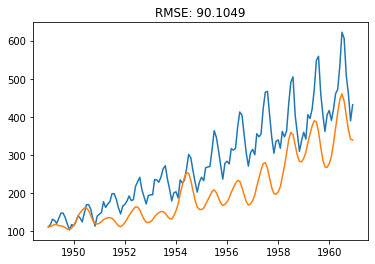

In [314]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
pyplot.plot(series['#Passengers'])
pyplot.plot(predictions_ARIMA)
pyplot.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-series['#Passengers'])**2)/len(series['#Passengers'])))

In [315]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

AttributeError: 'Figure' object has no attribute 'values'

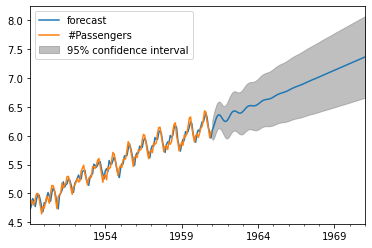

In [348]:
results_ARIMA.plot_predict(1,264)

In [303]:
x = results_ARIMA.forecast(steps =120)
print(x)

(array([6.09553392, 6.15281403, 6.22442966, 6.29241101, 6.34164715,
       6.36359358, 6.3578468 , 6.33139297, 6.29597532, 6.26447705,
       6.24738317, 6.25025164, 6.27275828, 6.30940304, 6.35151484,
       6.38988645, 6.41727368, 6.43011039, 6.42906672, 6.4184247 ,
       6.40456135, 6.39403596, 6.39183063, 6.40019485, 6.41833674,
       6.44295389, 6.46937416, 6.49293965, 6.51024096, 6.51989008,
       6.52267551, 6.52112358, 6.51864497, 6.5185366 , 6.52311893,
       6.53322332, 6.54812841, 6.56591529, 6.58410279, 6.60036508,
       6.61313233, 6.62192745, 6.62737751, 6.6309309 , 6.6343865 ,
       6.63937946, 6.64696466, 6.65739802, 6.67015286, 6.68414212,
       6.69806586, 6.71077859, 6.72157688, 6.73033938, 6.73749764,
       6.7438633 , 6.75037274, 6.75782544, 6.76668633, 6.77699774,
       6.7884127 , 6.80032804, 6.81207143, 6.82308707, 6.83307082,
       6.84202437, 6.85022255, 6.85811163, 6.86617282, 6.87479093,
       6.88416244, 6.89426325, 6.9048783 , 6.91567878, 6.9263

In [356]:
predXval = np.exp(x[0])
predXval

array([ 443.87097467,  470.03822976,  504.93497604,  540.45480072,
        567.73067691,  580.3280688 ,  577.00261492,  561.93881061,
        542.38458467,  525.56666832,  516.65904592,  518.14319123,
        529.93707998,  549.71669174,  573.36060226,  595.78892165,
        612.33142651,  620.24241045,  619.59542006,  613.03663463,
        604.59653422,  598.26629036,  596.94837332,  601.96231614,
        612.98271654,  628.25987422,  645.07988565,  660.46203978,
        671.98831897,  678.50379885,  680.39635918,  679.34125073,
        677.65951306,  677.58607796,  680.69812992,  687.61103176,
        697.9367009 ,  710.46187557,  723.50162334,  735.36360921,
        744.81236491,  751.39197483,  755.4982843 ,  758.18763855,
        760.81216134,  764.6203645 ,  770.44221554,  778.52260043,
        788.51612875,  799.62440149,  810.83603705,  821.20977661,
        830.12548957,  837.43142607,  843.44747976,  848.83371186,
        854.37716561,  860.76836518,  868.42943486,  877.43049

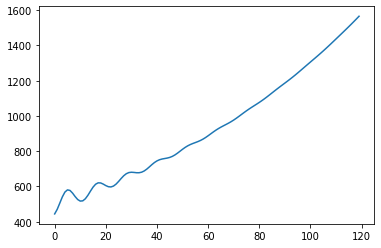

In [357]:
pyplot.plot(predXval)

In [500]:
import datetime
import calendar

def add_months(sourcedate, months):
    #sourcedate = datetime.datetime.strptime(sourcedate, '%Y-%m-%d')
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year,month)[1])
    return datetime.date(year, month, day)
#.strftime("%Y-%m-%d")

In [505]:
x = '2017-05-15'
x = datetime.datetime.strptime(x, '%Y-%m-%d')

In [506]:
add_months(x,1)

datetime.date(2017, 6, 15)

In [507]:
Months = []
print(x)
Months.append(x)

for i in range(119):    
    x = add_months(x,1)
    print(x)
    print(i)
    Months.append(x)

2017-05-15 00:00:00
2017-06-15
0
2017-07-15
1
2017-08-15
2
2017-09-15
3
2017-10-15
4
2017-11-15
5
2017-12-15
6
2018-01-15
7
2018-02-15
8
2018-03-15
9
2018-04-15
10
2018-05-15
11
2018-06-15
12
2018-07-15
13
2018-08-15
14
2018-09-15
15
2018-10-15
16
2018-11-15
17
2018-12-15
18
2019-01-15
19
2019-02-15
20
2019-03-15
21
2019-04-15
22
2019-05-15
23
2019-06-15
24
2019-07-15
25
2019-08-15
26
2019-09-15
27
2019-10-15
28
2019-11-15
29
2019-12-15
30
2020-01-15
31
2020-02-15
32
2020-03-15
33
2020-04-15
34
2020-05-15
35
2020-06-15
36
2020-07-15
37
2020-08-15
38
2020-09-15
39
2020-10-15
40
2020-11-15
41
2020-12-15
42
2021-01-15
43
2021-02-15
44
2021-03-15
45
2021-04-15
46
2021-05-15
47
2021-06-15
48
2021-07-15
49
2021-08-15
50
2021-09-15
51
2021-10-15
52
2021-11-15
53
2021-12-15
54
2022-01-15
55
2022-02-15
56
2022-03-15
57
2022-04-15
58
2022-05-15
59
2022-06-15
60
2022-07-15
61
2022-08-15
62
2022-09-15
63
2022-10-15
64
2022-11-15
65
2022-12-15
66
2023-01-15
67
2023-02-15
68
2023-03-15
69
2023-04-15

In [508]:
Months

[datetime.datetime(2017, 5, 15, 0, 0),
 datetime.date(2017, 6, 15),
 datetime.date(2017, 7, 15),
 datetime.date(2017, 8, 15),
 datetime.date(2017, 9, 15),
 datetime.date(2017, 10, 15),
 datetime.date(2017, 11, 15),
 datetime.date(2017, 12, 15),
 datetime.date(2018, 1, 15),
 datetime.date(2018, 2, 15),
 datetime.date(2018, 3, 15),
 datetime.date(2018, 4, 15),
 datetime.date(2018, 5, 15),
 datetime.date(2018, 6, 15),
 datetime.date(2018, 7, 15),
 datetime.date(2018, 8, 15),
 datetime.date(2018, 9, 15),
 datetime.date(2018, 10, 15),
 datetime.date(2018, 11, 15),
 datetime.date(2018, 12, 15),
 datetime.date(2019, 1, 15),
 datetime.date(2019, 2, 15),
 datetime.date(2019, 3, 15),
 datetime.date(2019, 4, 15),
 datetime.date(2019, 5, 15),
 datetime.date(2019, 6, 15),
 datetime.date(2019, 7, 15),
 datetime.date(2019, 8, 15),
 datetime.date(2019, 9, 15),
 datetime.date(2019, 10, 15),
 datetime.date(2019, 11, 15),
 datetime.date(2019, 12, 15),
 datetime.date(2020, 1, 15),
 datetime.date(2020, 2, 

In [509]:
# intialise data of lists. 
data = {'Name':Months, 'Age':predXval} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df 

,Name,Age
0,2017-05-15,443.870975
1,2017-06-15,470.038230
2,2017-07-15,504.934976
3,2017-08-15,540.454801
4,2017-09-15,567.730677
...,...,...
115,2026-12-15,1506.941684
116,2027-01-15,1521.330270
117,2027-02-15,1535.938099
118,2027-03-15,1550.769936


In [510]:
data2 = pd.Series(data=data['Age'], index=data['Name'] )

In [511]:
data2

2017-05-15 00:00:00     443.870975
2017-06-15              470.038230
2017-07-15              504.934976
2017-08-15              540.454801
2017-09-15              567.730677
                          ...     
2026-12-15             1506.941684
2027-01-15             1521.330270
2027-02-15             1535.938099
2027-03-15             1550.769936
2027-04-15             1565.808111
Length: 120, dtype: float64

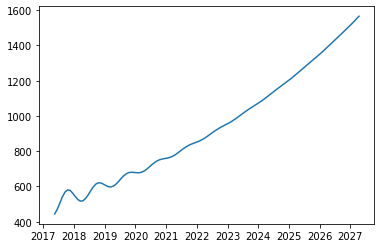

In [512]:
pyplot.plot(data2)

In [322]:
#result of the forecast() function is an array containing the forecast value, the standard error of the forecast, 
#and the confidence interval information.
ts = results_ARIMA.forecast()

In [324]:
ts

(array([6.09553392]), array([0.08384711]), array([[5.9311966 , 6.25987124]]))

In [325]:
ts = results_ARIMA.forecast()[0]

In [326]:
ts

array([6.09553392])

# 

In [328]:
start_index = '1961-01-01'
end_index = '1961-12-01'
forecast = results_ARIMA.predict(start=start_index, end=end_index)

In [329]:
print(forecast)

1961-01-01    0.027108
1961-02-01    0.057280
1961-03-01    0.071616
1961-04-01    0.067981
1961-05-01    0.049236
1961-06-01    0.021946
1961-07-01   -0.005747
1961-08-01   -0.026454
1961-09-01   -0.035418
1961-10-01   -0.031498
1961-11-01   -0.017094
1961-12-01    0.002868
Freq: MS, dtype: float64


In [331]:
newprd = np.exp(forecast)

In [332]:
newprd

1961-01-01    1.027479
1961-02-01    1.058952
1961-03-01    1.074242
1961-04-01    1.070345
1961-05-01    1.050468
1961-06-01    1.022189
1961-07-01    0.994270
1961-08-01    0.973893
1961-09-01    0.965202
1961-10-01    0.968993
1961-11-01    0.983051
1961-12-01    1.002873
Freq: MS, dtype: float64

In [347]:
newprd_cumsum = newprd.cumsum()
print (newprd_cumsum.head(20))

1961-01-01     1.027479
1961-02-01     2.086431
1961-03-01     3.160674
1961-04-01     4.231019
1961-05-01     5.281488
1961-06-01     6.303677
1961-07-01     7.297946
1961-08-01     8.271839
1961-09-01     9.237042
1961-10-01    10.206034
1961-11-01    11.189086
1961-12-01    12.191958
Freq: MS, dtype: float64


In [346]:
newprd_cumsum[1]
#predictions_ARIMA_log = pd.Series(newprd_cumsum.iloc[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head(100)

2.086431498664205